In [1]:
import pandas as pd

file_path = "train.csv"

train_data = pd.read_csv(file_path)

print(train_data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Data set is loaded , Checking for Data value issues

In [18]:
# Calculate summary statistics
summary = train_data.describe()

# Display the summary statistics
print(summary)

# Check for duplicates
duplicates = train_data.duplicated().sum()

# Print the number of duplicates
print("Number of duplicates:", duplicates)


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

The Data set is valid, as it has a good distribution of values and 0 duplicates are found.

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

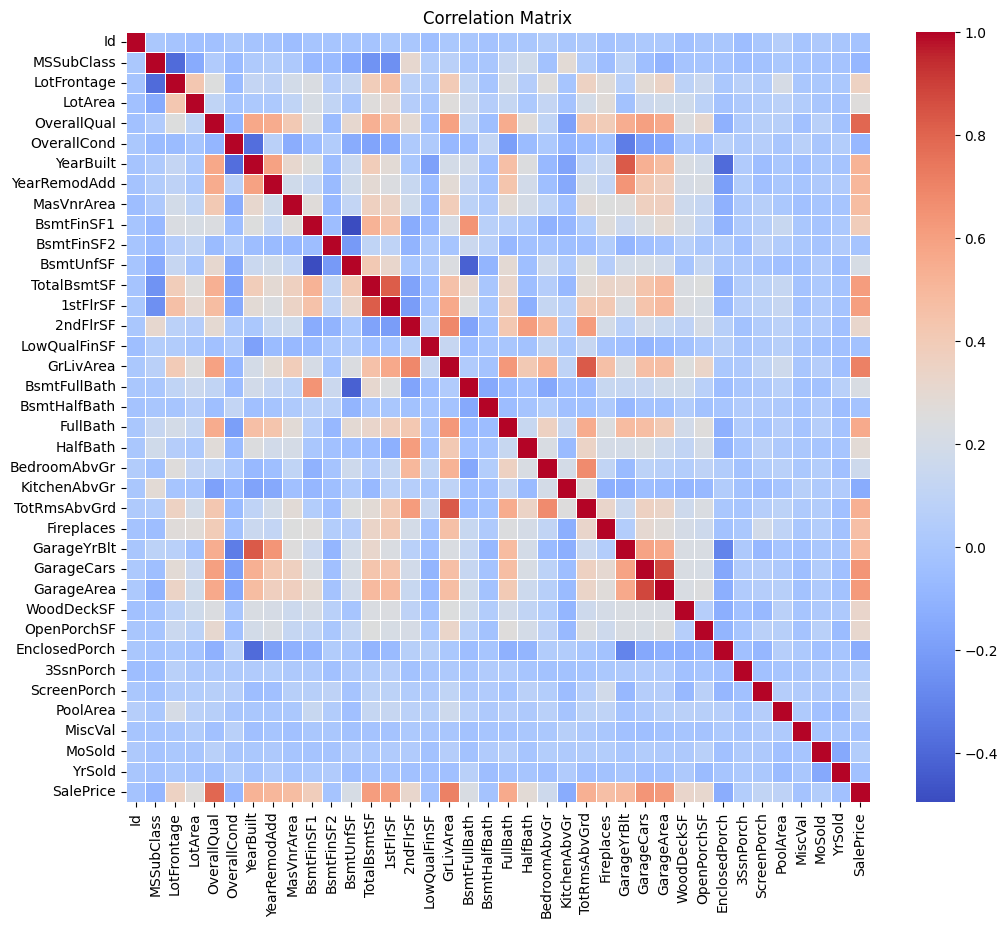

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_data = train_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()



Co-relation matrix showcases very highly co-related values , other values can be dropped to increase the efficiency of the Linnear regression.

Taking Values with corelation x>0.6 and x<-0.4

In [15]:
positive_threshold = 0.6
negative_threshold = -0.4

# Extract pairs with correlation > +0.6 or < -0.4
correlated_pairs = []

for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Avoid duplicate pairs
        correlation_value = correlation_matrix.iloc[i, j]
        if correlation_value > positive_threshold or correlation_value < negative_threshold:
            correlated_pairs.append((
                correlation_matrix.index[i],  # Row name
                correlation_matrix.columns[j],  # Column name
                correlation_value  # Correlation value
            ))

# Sort the pairs by correlation value in ascending order
correlated_pairs_sorted = sorted(correlated_pairs, key=lambda x: x[2])

# Display the sorted results
for pair in correlated_pairs_sorted:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

# Display the sorted results length
print("Highly Corelated Values of the data set :",len(pair[1]))

BsmtFinSF1 and BsmtUnfSF: -0.50
BsmtUnfSF and BsmtFullBath: -0.42
OverallQual and GarageCars: 0.60
1stFlrSF and SalePrice: 0.61
2ndFlrSF and HalfBath: 0.61
TotalBsmtSF and SalePrice: 0.61
2ndFlrSF and TotRmsAbvGrd: 0.62
GarageArea and SalePrice: 0.62
GrLivArea and FullBath: 0.63
GarageCars and SalePrice: 0.64
YearRemodAdd and GarageYrBlt: 0.64
BsmtFinSF1 and BsmtFullBath: 0.65
BedroomAbvGr and TotRmsAbvGrd: 0.68
2ndFlrSF and GrLivArea: 0.69
GrLivArea and SalePrice: 0.71
OverallQual and SalePrice: 0.79
TotalBsmtSF and 1stFlrSF: 0.82
GrLivArea and TotRmsAbvGrd: 0.83
YearBuilt and GarageYrBlt: 0.83
GarageCars and GarageArea: 0.88
Highly Corelated Values of the data set : 10


Dropping outliers from the data set

In [29]:
import pandas as pd

# Load the dataset
file_path = "train.csv"
train_data = pd.read_csv(file_path)

# Select only numeric columns (excluding non-numeric columns like strings and objects)
numeric_data = train_data.select_dtypes(include=[float, int])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric column
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the rows where any of the numeric features are outside the IQR bounds
outliers = (numeric_data < lower_bound) | (numeric_data > upper_bound)

# Drop the rows with outliers (those that have any NaN in the outliers dataframe)
train_data_no_outliers = train_data[~outliers.any(axis=1)]

# Display the cleaned dataset (without outliers)
print(train_data_no_outliers.head())


    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   

   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
0          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
2          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
4          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
6          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
10         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       2   2008        WD         Normal  

In [33]:
import plotly.express as px

# Scatter plot between LotArea and SalePrice
fig = px.scatter(train_data, x="LotArea", y="SalePrice", title="LotArea vs. SalePrice")

# Customize the layout for better visual appeal
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.update_layout(xaxis_title="LotArea", yaxis_title="SalePrice")

# Display the plot
fig.show()
# Scatter plot between LotArea and SalePrice
fig = px.scatter(train_data_no_outliers, x="LotArea", y="SalePrice", title="LotArea vs. SalePrice (REMOVED OUTLIERS)")

# Customize the layout for better visual appeal
fig.update_layout(template="plotly_dark")
fig.update_layout(title_font_size=20)
fig.update_layout(xaxis_title="LotArea", yaxis_title="SalePrice")

# Display the plot
fig.show()


Dropped data set allows us to focus on the majority of cases.

In [34]:
# List of pairs to visualize
pairs = [
    ("OverallQual", "SalePrice"),
    ("GrLivArea", "SalePrice"),
    ("GarageCars", "SalePrice"),
    ("TotalBsmtSF", "1stFlrSF"),
    ("GrLivArea", "TotRmsAbvGrd"),
    ("GarageCars", "GarageArea"),
    ("BedroomAbvGr", "TotRmsAbvGrd"),
    ("BsmtFinSF1", "BsmtFullBath"),
    ("2ndFlrSF", "GrLivArea"),
    ("YearBuilt", "GarageYrBlt")
]

# Plot each pair
for feature_x, feature_y in pairs:
    fig = px.scatter(train_data_no_outliers, x=feature_x, y=feature_y, title=f"{feature_x} vs {feature_y}")
    fig.update_layout(template="plotly_dark")
    fig.update_layout(title_font_size=20)
    fig.update_layout(xaxis_title=feature_x, yaxis_title=feature_y)
    fig.show()
